In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [12]:
from ias.Datasets import Emnist
from ias.PCA import PCA
from ias.Metrics import *

In [4]:
indices = np.arange(len(Emnist.attributes))
np.random.shuffle(indices)
train_size = int(10000)

train_i = indices[:train_size]
train_x = Emnist.attributes[train_i]
train_y = Emnist.labels[train_i]

test_i = indices[train_size:]
test_x = Emnist.attributes[test_i]
test_y = Emnist.labels[test_i]

In [5]:
pca = PCA(n_composantes=0.85)
pca.fit(train_x)

In [6]:
compressed_train_x = pca.compress(train_x)
compressed_test_x = pca.compress(test_x)

In [19]:
tree = DecisionTreeClassifier()
tree = tree.fit(compressed_train_x, train_y)

0.8272

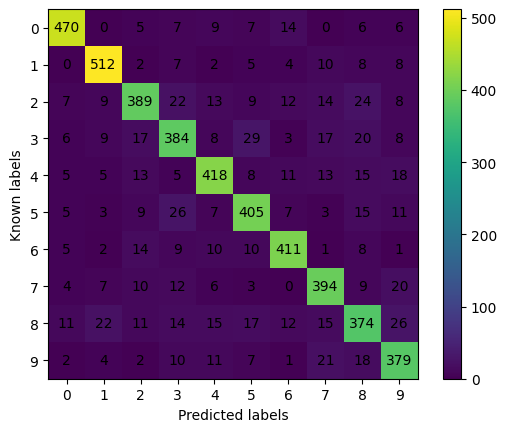

In [14]:
show_confusion_matrix(confusion_matrix(Emnist.class_number, test_y[:5000], tree.predict(test_x[:5000])), Emnist.class_names)
accuracy_score(test_y[:5000], tree.predict(test_x[:5000]))

In [18]:
import sklearn.tree as t
import graphviz
g = t.export_graphviz(tree)
graph = graphviz.Source(g)  
graph.render("pouet2")

'pouet2.pdf'